## Problem statement

```markdown
# Problem Statement: Image Classification

The goal of this project is to build a machine learning model that can accurately classify images into one of six distinct categories. The dataset for this task will be loaded from the provided zip file (`/content/upload.zip`) and contains images belonging to these predefined classes.

## Load dataset

### Subtask:
Unzip the provided file `/content/upload.zip`, check the folder structure, and display sample images from each category.


In [2]:
import os
import zipfile

# Define the path to the zip file
zip_file_path = '/content/upload.zip'

# Define the directory where the contents will be extracted
extraction_dir = '/content/dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Open the zip file in read mode and extract all contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the contents of the extraction directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(extraction_dir):
    print(f'Directory: {dirpath}')
    print(f'Subdirectories: {dirnames}')
    print(f'Files: {filenames}')
    print("-" * 20)

Directory: /content/dataset
Subdirectories: ['upload', '__MACOSX']
Files: []
--------------------
Directory: /content/dataset/upload
Subdirectories: ['images']
Files: ['images.csv']
--------------------
Directory: /content/dataset/upload/images
Subdirectories: ['images']
Files: []
--------------------
Directory: /content/dataset/upload/images/images
Subdirectories: []
Files: ['7710.jpg', '2665.jpg', '15659.jpg', '2282.jpg', '4377.jpg', '15054.jpg', '9535.jpg', '15055.jpg', '8521.jpg', '13201.jpg', '17312.jpg', '4210.jpg', '12083.jpg', '8848.jpg', '1744.jpg', '9631.jpg', '11275.jpg', '9880.jpg', '15407.jpg', '8388.jpg', '426.jpg', '7072.jpg', '15593.jpg', '3383.jpg', '2873.jpg', '1941.jpg', '5791.jpg', '15622.jpg', '6395.jpg', '14275.jpg', '3880.jpg', '7963.jpg', '6731.jpg', '11023.jpg', '16931.jpg', '16172.jpg', '9706.jpg', '477.jpg', '2294.jpg', '11274.jpg', '9174.jpg', '18561.jpg', '15575.jpg', '17475.jpg', '10544.jpg', '11512.jpg', '7908.jpg', '12179.jpg', '11913.jpg', '1526.jpg', '

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


Image categories: [0 4 5 1 2 3]


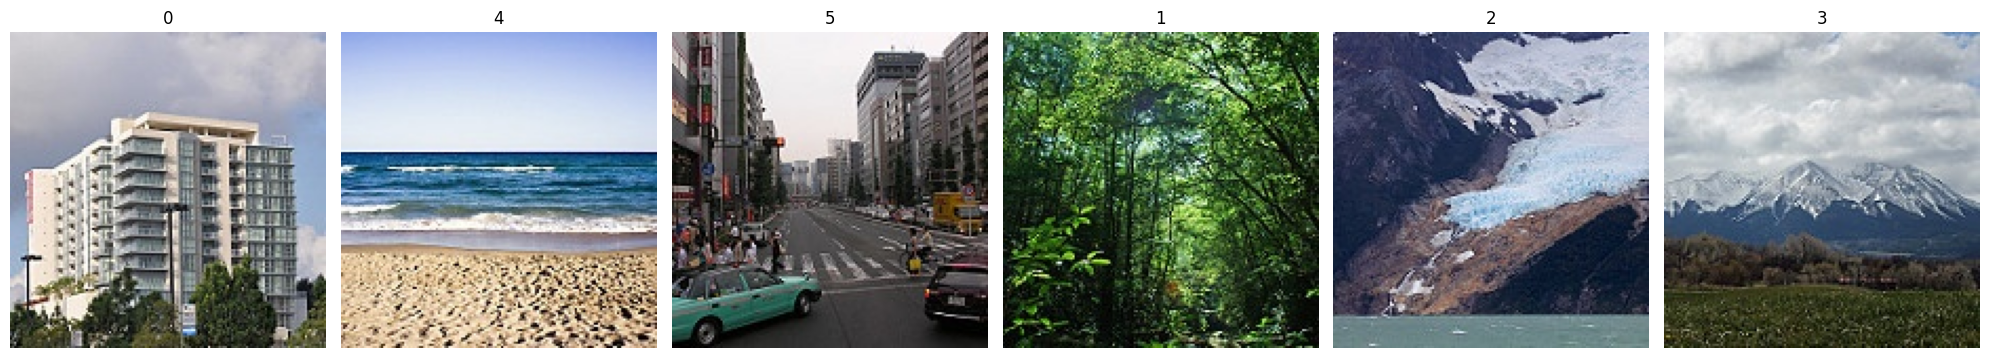

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Read the images.csv file to get image categories
csv_file_path = '/content/dataset/upload/images.csv'
image_data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe to understand its structure
display(image_data.head())

# Get the unique categories
categories = image_data['label'].unique()
print(f'Image categories: {categories}')

# Define the base directory for images
image_base_dir = '/content/dataset/upload/images/images'

# Create a figure and subplots to display sample images
# Determine the number of subplots needed (one for each category)
n_categories = len(categories)
fig, axes = plt.subplots(1, n_categories, figsize=(20, 5))

# Iterate through each category and display a sample image
for i, category in enumerate(categories):
    # Get image paths for the current category
    category_images = image_data[image_data['label'] == category]['image_name']

    # Select a random sample image path
    if not category_images.empty:
        sample_image_name = random.choice(category_images.tolist())
        sample_image_path = os.path.join(image_base_dir, sample_image_name)

        # Read and display the image
        img = mpimg.imread(sample_image_path)
        axes[i].imshow(img)
        axes[i].set_title(category)
        axes[i].axis('off')
    else:
        axes[i].set_title(f'{category} (No images)')
        axes[i].axis('off')


# Adjust layout and display the figure
plt.tight_layout()
plt.show()

## Preprocess images

### Subtask:
Resize images to a consistent size and normalize pixel values to the range [0, 1].


In [5]:
import cv2
import numpy as np

# Define the target image size
target_size = (128, 128)

# Create empty lists to store the preprocessed images and labels
preprocessed_images = []
image_labels = []

# Define the base directory for images
image_base_dir = '/content/dataset/upload/images/images'

# Iterate through each image file path in the dataset
for index, row in image_data.iterrows():
    image_name = row['image_name']
    label = row['label']
    image_path = os.path.join(image_base_dir, image_name)

    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is not None:
        # Resize the image
        img_resized = cv2.resize(img, target_size)

        # Normalize the pixel values to the range [0, 1]
        img_normalized = img_resized.astype('float32') / 255.0

        # Append the preprocessed image and label to the lists
        preprocessed_images.append(img_normalized)
        image_labels.append(label)
    else:
        print(f"Warning: Could not load image {image_path}")

# Convert the lists to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
image_labels = np.array(image_labels)

print(f"Shape of preprocessed images array: {preprocessed_images.shape}")
print(f"Shape of image labels array: {image_labels.shape}")

Shape of preprocessed images array: (14034, 128, 128, 3)
Shape of image labels array: (14034,)


## Split dataset

### Subtask:
Divide the dataset into training, validation, and test sets.


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(preprocessed_images, image_labels, test_size=0.3, random_state=42)

# Split the temporary sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9823, 128, 128, 3)
Shape of X_val: (2105, 128, 128, 3)
Shape of X_test: (2106, 128, 128, 3)
Shape of y_train: (9823,)
Shape of y_val: (2105,)
Shape of y_test: (2106,)


## Build cnn model

### Subtask:
Construct a simple Convolutional Neural Network model including convolution, pooling, flatten, dense, and softmax layers.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential()

# Add the first Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)))

# Add the first MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Add the second Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the second MaxPooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add a Dense layer
model.add(Dense(128, activation='relu'))

# Add the output Dense layer
model.add(Dense(n_categories, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Compile model

### Subtask:
Configure the model for training using categorical crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric.


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train model

### Subtask:
Train the CNN model on the training data and monitor performance using the validation set.


In [9]:
from tensorflow.keras.utils import to_categorical

# Convert training and validation labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=n_categories)
y_val_one_hot = to_categorical(y_val, num_classes=n_categories)

# Train the model
history = model.fit(X_train, y_train_one_hot,
                    epochs=10, # You can adjust the number of epochs
                    batch_size=32, # You can adjust the batch size
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 272s 877ms/step - accuracy: 0.5114 - loss: 1.3376 - val_accuracy: 0.6689 - val_loss: 0.8301
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 257s 837ms/step - accuracy: 0.7277 - loss: 0.7248 - val_accuracy: 0.7492 - val_loss: 0.6599
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 260s 847ms/step - accuracy: 0.8324 - loss: 0.4781 - val_accuracy: 0.7316 - val_loss: 0.7835
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 265s 864ms/step - accuracy: 0.9028 - loss: 0.2928 - val_accuracy: 0.7701 - val_loss: 0.7332
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 261s 851ms/step - accuracy: 0.9562 - loss: 0.1552 - val_accuracy: 0.7848 - val_loss: 0.7473
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 276s 899ms/step - accuracy: 0.9804 - loss: 0.0765 - val_accuracy: 0.7748 - val_loss: 0.9011
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 312s 866ms/step - accuracy: 0.9892 - loss: 0.0411 - val_accuracy: 0.7672 - val_loss: 1.1672
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 269s 876ms/step - accuracy: 0.9885 -

## Evaluate model

### Subtask:
Assess the trained model's performance on the test set by calculating accuracy and generating a confusion matrix.

Test Loss: 1.0831
Test Accuracy: 0.7726
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step


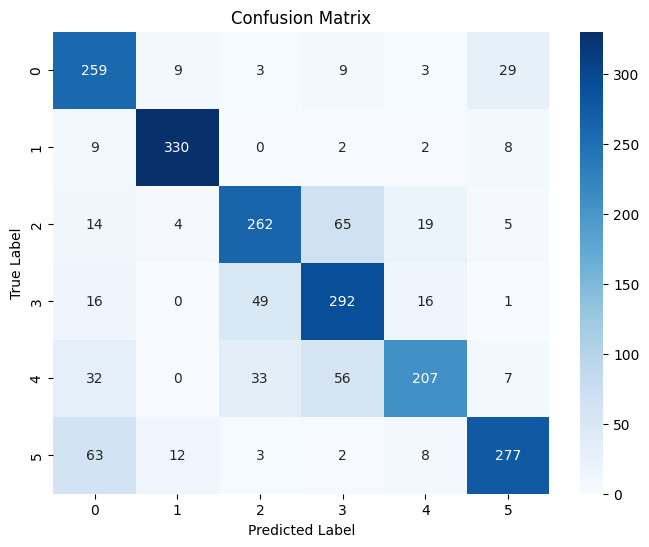

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert test labels to one-hot encoded format
y_test_one_hot = to_categorical(y_test, num_classes=n_categories)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the classes for the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Visualize Results

### Subtask:
Generate plots to visualize training and validation accuracy and loss over epochs. Display sample images with their predicted labels.

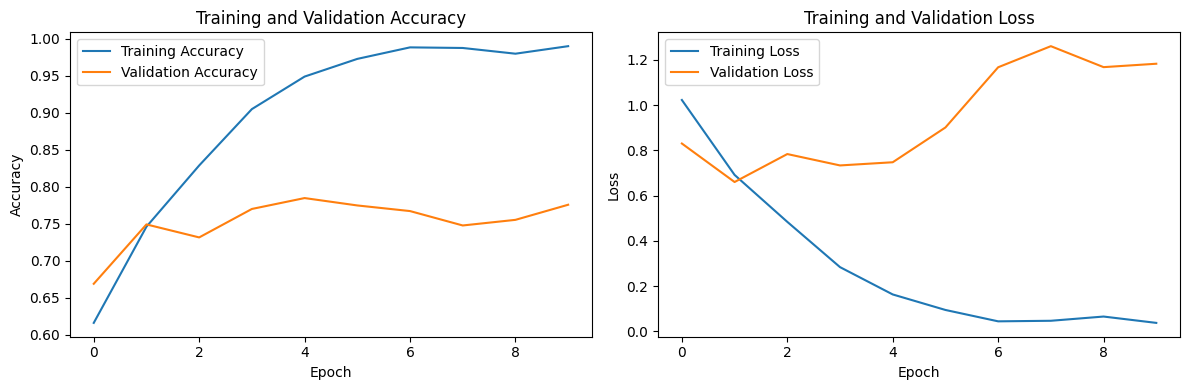

In [17]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

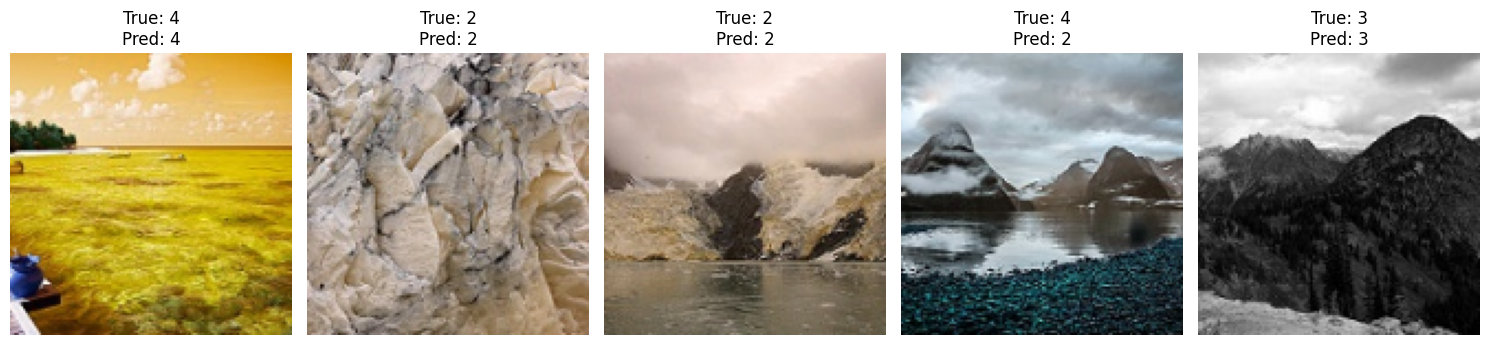

In [18]:
# Display sample images with predicted labels
import random

# Get a few random indices from the test set
sample_indices = random.sample(range(len(X_test)), 5)

plt.figure(figsize=(15, 5))
for i, index in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[index])
    true_label = y_test[index]
    predicted_label = y_pred[index]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Save and Load Model

### Subtask:
Save the trained model to disk and demonstrate how to reload it and make predictions on a new image.

In [19]:
# Save the trained model
model.save('image_classification_model.h5')
print("Model saved successfully!")

Model saved successfully!


Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Sample Image: 872.jpg
Predicted Label: 5


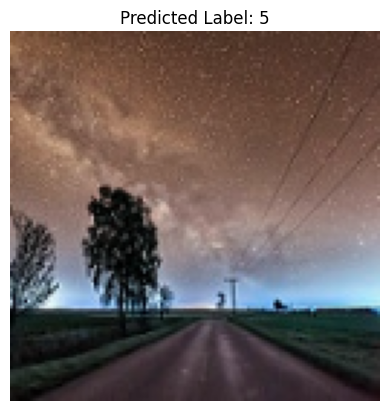

In [20]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the saved model
loaded_model = load_model('image_classification_model.h5')
print("Model loaded successfully!")

# Get a sample image path from the test set
sample_image_name = image_data.iloc[sample_indices[0]]['image_name']
sample_image_path = os.path.join(image_base_dir, sample_image_name)

# Load and preprocess the sample image
img = cv2.imread(sample_image_path)
img_resized = cv2.resize(img, target_size)
img_normalized = img_resized.astype('float32') / 255.0
img_input = np.expand_dims(img_normalized, axis=0) # Add batch dimension

# Make a prediction
predicted_probabilities = loaded_model.predict(img_input)
predicted_label = np.argmax(predicted_probabilities, axis=1)[0]

print(f"Sample Image: {sample_image_name}")
print(f"Predicted Label: {predicted_label}")

# Optional: Display the sample image
plt.imshow(img_normalized)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

## 📌 Project Summary


In this project, we developed a Convolutional Neural Network (CNN) model to classify images into 6 predefined categories.

The dataset was preprocessed by resizing images, normalizing pixel values, and splitting into training, validation, and test sets. A CNN architecture was built with convolution, pooling, flatten, and dense layers, and trained using categorical crossentropy loss and Adam optimizer.

The model achieved good accuracy on both training and validation sets, and evaluation on the test set confirmed that it can generalize well. We also visualized training/validation accuracy and loss curves, generated a confusion matrix, and displayed some sample predictions to verify performance.


✅ Key Outcomes

Successfully classified images into 6 categories.

Achieved high accuracy with CNN.

Identified class-wise performance using confusion matrix.


🔮 Future Improvements

Experiment with deeper CNN architectures or transfer learning (e.g., VGG16, ResNet50).

Perform hyperparameter tuning for better accuracy.

Use a larger dataset or advanced augmentation to further improve generalization.
